<a href="https://colab.research.google.com/github/mamuncseru/deep-learning-hnm-fusemachine/blob/main/2_4_4E_Gradient_Descent_HnM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required library
import numpy as np
import matplotlib.pyplot as plt

## Define Dataset and plot x vs y

In [ ]:
# define a simple range of values for x and reshape
np.random.seed(127)
x = np.linspace(0, 1, 200)
noise = np.random.normal(0, 0.02, x.shape)
x = x + noise
x = np.sort(x)

# y = (2 * np.sin(10*x) + np.cos(20*x-3) + 3 * np.log(10*x + 0.5) -4)/6
y = np.cos(x) + 0.8*x - 0.5
noise = np.random.normal(0, 0.03, x.shape)
y= y + noise
x = x - 0.5

In [ ]:
## Let's build a function to scatter func for reusability
# it takes x axis and yaxis element to populate the graph
def scatter_func(x, y):
    plt.figure(figsize=(12, 5))
    plt.scatter(x, y, color='g', label='data points')
    plt.title('x vs y')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

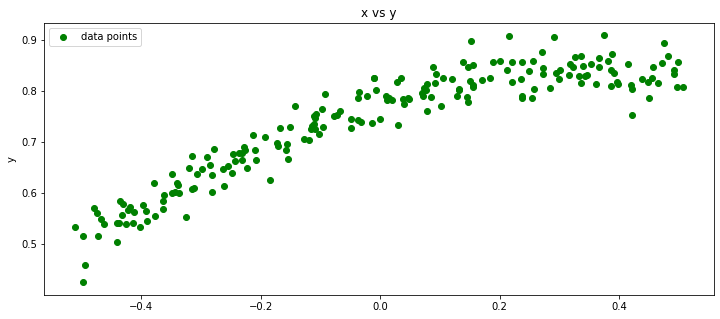

In [ ]:
scatter_func(x, y)

In [ ]:
len(x)

200

In [ ]:
# let's create a error calculation function to calculate average loss (cost)
def error_calculation(m, b, x, y):
    total_error = 0
    N = len(x)

    for i in range(N):
        actual_output = y[i]
        inp = x[i]
        predicted_output = m * inp + b
        total_error = total_error + (predicted_output - actual_output)**2

    total_error = total_error / N
    return total_error


In [ ]:
# check the function works
print(error_calculation(2, 3, x, y))

5.347956741233319


In [13]:
# lets create a plot_func to pot the line for reusability
# here we only give x and calculate y for given x.
def plot_func(b, m, x):
    plt.plot(x, m*x+b, label='fitting line', color='r')
    plt.legend(loc='best')

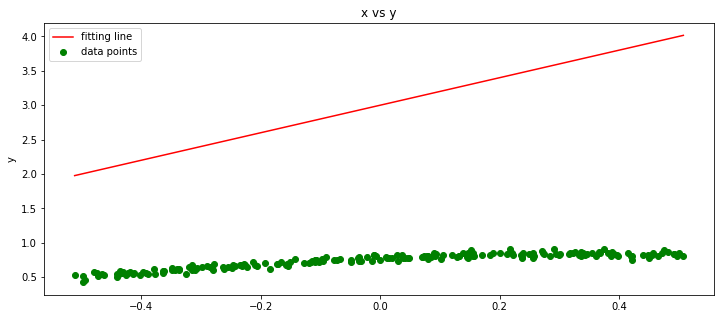

In [14]:
# let's see the Inner line fitting with b=2 and m=3
scatter_func(x, y)
plot_func(3, 2, x)
plt.show()

# lets visualize error surface in 3d

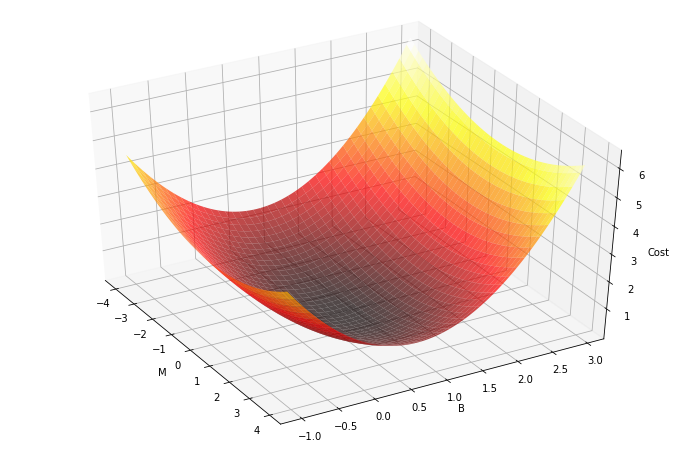

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
ax.view_init(elev=40, azim=-30)
fig.show()

m__ = np.arange(-4, 4, .05)
b__ = np.arange(-1, 3, 0.05)
u__, v__ = np.meshgrid(m__, b__)
cost = np.array([error_calculation(m, b, x, y) for m, b in zip(np.ravel(u__), np.ravel(v__))])
z__ = cost.reshape(u__.shape)

ax.clear()
ax.plot_surface(u__, v__, z__, cmap='hot', alpha=.7) 
ax.set_xlabel('M')
ax.set_ylabel('B')
ax.set_zlabel('Cost')
fig.canvas.draw()

In [22]:
def gradient_descent(m, b, inp, op):
    m_grad = 0
    b_grad = 0
    N = len(x)

    for i in range(N):
        m_grad = m_grad + ((2/N) * ((m * x[i] + b) - y[i]) * x[i])
        b_grad = b_grad + ((2/N) * (m * x[i] + b) - y[i])

    # update the weights
    m_updated = m - 0.01 * m_grad
    b_updated = b - 0.01 * b_grad

    return m_updated, b_updated
    

In [17]:
def gradient_descent_step_by_step(m_starting, b_starting, x, y, steps):
    m = m_starting
    b = b_starting
    for i in range(steps):
        m, b = gradient_descent(m, b, x, y)
    
    return m, b

## To run gradient descent now we can just call gradient_descent_step by_step(-3, 2.4, x,y, 10) to get the final value of slope and bias. The below code is just for animation

In [18]:
import matplotlib
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

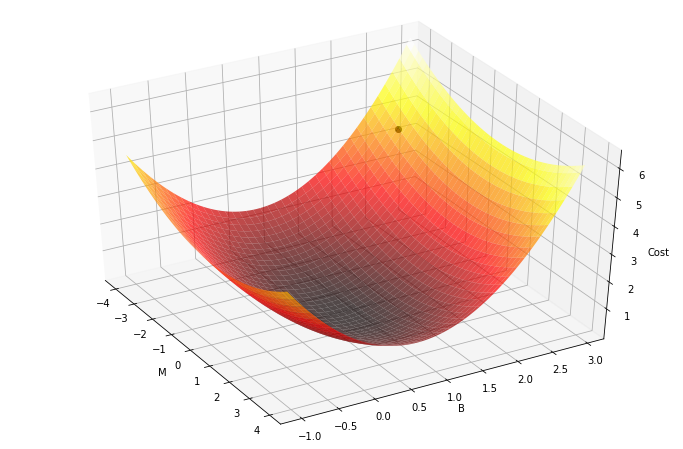

In [23]:
## visualizing the gradient descent step:

fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
ax.view_init(elev=40, azim=-30)

m = -3
b = 2.5

def update(i):
    global m, b, x, y

    ## plot the error surface
    ax.clear()
    ax.plot_surface(u__, v__, z__, cmap='hot', alpha=0.7)
    ax.set_xlabel('M')
    ax.set_ylabel('B')
    ax.set_zlabel('Cost')

    ### plot the current position of parameters in Error surface
    ax.plot([m], [b], [error_calculation(m,b,x,y)], marker='o', lw=5, color='k')
    ### perform gradient descent 10-steps for faster animation
    m, b = gradient_descent_step_by_step(m, b, x, y, 10)

ani = FuncAnimation(fig, update, interval=100)
plt.show()


In [24]:
HTML(ani.to_html5_video())